# Data Science and Business Analytics Intern @ The Sparks Foundation [GRIPJUNE2021]
# Author : HASTI SUTARIA

# Task : 2 Prediction using unsupervised ML
**=> To predict the optimum number of clusters and repersent it visually using Iris dataset.**

# Step : 1 Importing all the necessary libraries

In [41]:
import pandas as pd
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
print("Libraries imported successfully!")

Libraries imported successfully!


# Step : 2 Reading dataset

In [42]:
#reading the  Iris dataset
data_set = pd.read_csv('Iris.csv')
data_set

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [43]:
#renaming columns
data= data_set.set_index('Id').rename(columns={'SepalLengthCm': 'Sepal Length', 'SepalWidthCm': 'Sepal Width', 'PetalLengthCm': 'Petal Length', 'PetalWidthCm': 'Petal Width'})
data

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


# Step: 3 Studying the dataset


In [44]:
data.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [45]:
data.corr()

,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,1.000000,-0.109369,0.871754,0.817954
Sepal Width,-0.109369,1.000000,-0.420516,-0.356544
Petal Length,0.871754,-0.420516,1.000000,0.962757
Petal Width,0.817954,-0.356544,0.962757,1.000000


# Step: 4 Optimum number of clusters for Kmeans Classifier using elbow method.

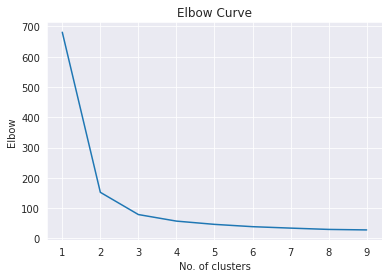

In [46]:
elbow_curve =[]
for i in range(1, 10):
  kmeans = KMeans(n_jobs = -1, n_clusters = i, init='k-means++')
  kmeans.fit(data.iloc[:,[0,1,2,3]])
  elbow_curve.append(kmeans.inertia_)

#plotting the elbow curve
plt.plot(range(1,10), elbow_curve)
plt.title('Elbow Curve')
plt.xlabel('No. of clusters')
plt.ylabel('Elbow')
plt.show()
# no. of clusters = 3

# Step: 5 To study the correlation between the data.

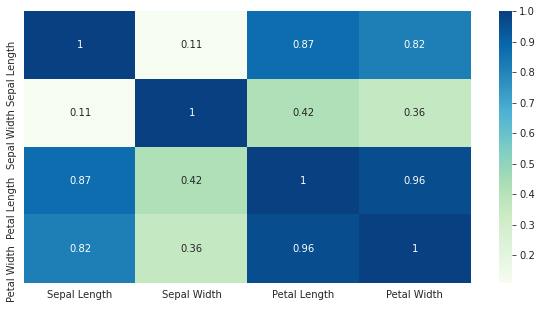

In [47]:
plt.figure(figsize=(10,5))
sns.heatmap(abs(data.corr()), cmap='GnBu', annot=True);

# Step: 6 Joint plotting the data.

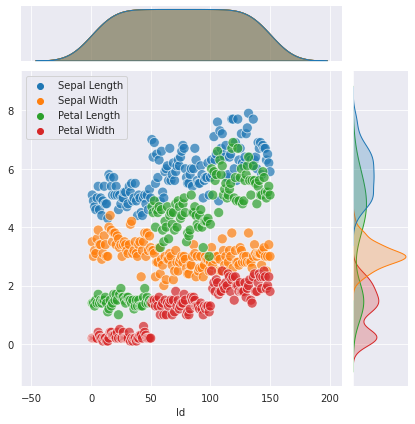

In [48]:
sns.jointplot(data=data, s=100, alpha = 0.7, height = 6)
plt.show()

# Step : 7 Kmeans clustering

In [49]:
x = data.iloc[:, [2,3]].values

# Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(x)

In [50]:
# to retrieve the centers of clusters
kmeans.cluster_centers_

array([[1.464     , 0.244     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

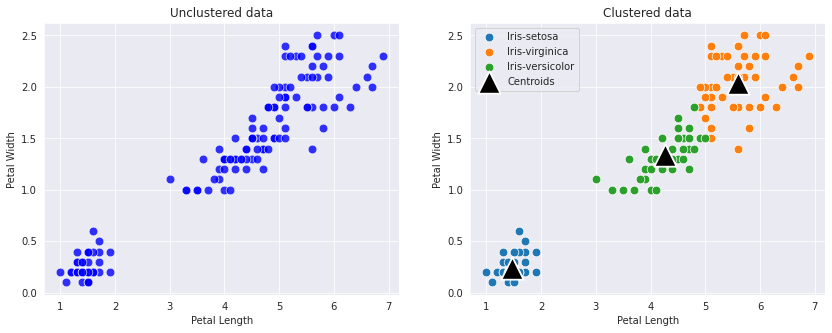

In [51]:
#plotting the data
species = ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
fig, ax = plt.subplots(1,2, figsize=(14,5))

#unclustered data
ax[0].set_title('Unclustered data')
ax[0].set_xlabel('Petal Length')
ax[0].set_ylabel('Petal Width')
sns.scatterplot(data['Petal Length'], data['Petal Width'], 
                s=75, color='blue', alpha=0.8, ax=ax[0])

#clustered data
ax[1].set_title('Clustered data')
ax[1].set_xlabel('Petal Length')
ax[1].set_ylabel('Petal Width')
for i in range(0, 3):
    sns.scatterplot(x[y_kmeans == i, 0], x[y_kmeans == i, 1], s=75, label=species[i], ax=ax[1])
    
#centroids
sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
                s=500, color='black', label='Centroids', marker='^', ax=ax[1])
plt.show()


# Thank You!